# Example 9.5: Modified Brayton Cycle (Cold-Air-Standard)

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement

A Brayton cycle with intercooling, reheat, and regeneration has the following properties:
\begin{align}
T_1&=300\ \mathrm{K} & T_3&=350\ \mathrm{K} & T_6&=T_8=1400\ \mathrm{K} \\
p_1 &= 1\ \mathrm{bar}  & \frac{p_2}{p_1}&=\frac{p_4}{p_3}=\sqrt{10} & p_7&=\sqrt{10}\ \mathrm{bar}\\
\eta_{c,1} &= \eta_{c,2} = 0.8 & \eta_{t,1}&=\eta_{t,2}=0.8 & \eta_{reg}&= 0.85
\end{align}
Determine:
* (a) $w_{net}$
* (b) $q_{in}$
* (c) $\eta_{th}$
* (d) $BWR$

*Figure temporarily removed to avoid violating copyright. A replacement will be uploaded in a future release*

## Solution


### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be using.

In [1]:
from kilojoule.templates.kSI_K import *
from math import log, sqrt

air = idealgas.Properties('Air')

/opt/anaconda/lib/python3.8/site-packages/mpmath/ctx_mp_python.py:892: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if other is 0:
/opt/anaconda/lib/python3.8/site-packages/mpmath/ctx_mp_python.py:986: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if other is 0:


### Given Parameters
We now define variables to hold our known values.

In [2]:
T[1] = Quantity(300,'K')      # Compressor Inlet Temperature
T[3] = Quantity(350,'K')
T[6] = T[8] = Quantity(1400,'K')
p[1] = Quantity(1,'bar')      # Compressor Inlet pressure
r_p = Quantity(sqrt(10),' ')   # Pressure ratio
p[7] = Quantity(sqrt(10),'bar')
eta_c = Quantity(0.8,'')      # Compressor Isentropioc Efficiency
eta_t = Quantity(0.8,'')      # Turbine Isentropic Efficiency
eta_reg = Quantity(0.85,'')   # Regenerator effectiveness

display.Summary(locals());

<IPython.core.display.Latex object>

,T,p
unit,K,kPa
1,300,100
3,350,-
6,1400,-
7,-,316.228
8,1400,-


### Assumptions
- Cold-air-standard Analysis
  - Ideal gas
  - Constant specific heat (evaluated at $25^\circ\text{C}$)
- Isobaric heat exchagners: Intercooler, Combustors, Regeneator
- Negligible changes in kinetic energy
- Negligible changes in potential energy

In [3]:
# Ideal Gas
R = air.R

# Constant thermal properties evaluated at room temperature
T_room = Quantity(25,'degC')
c_v = air.Cv(T=T_room)
c_p = air.Cp(T=T_room)
k = air.k(T=T_room)

# Isobaric heat exchangers
p[2] = r_p*p[1]
p[3] = p[2]
p[4] = r_p*p[3]
p[5] = p[4]
p[6] = p[5]
p[8] = p[7]
p[9] = p[1]
p[10] = p[9]

display.Summary(locals());

<IPython.core.display.Latex object>

,T,p
unit,K,kPa
1,300,100.000000
2,-,316.227766
3,350,316.227766
4,-,1000.000000
5,-,1000.000000
6,1400,1000.000000
7,-,316.227766
8,1400,316.227766
9,-,100.000000


#### (a) $w_{net}$

In [4]:
##### 1$\to$2) Non-ideal compression
# Isentropic exit state: Isentropic Ideal Gas Relations
p['2s'] = p[2]
T['2s'] = T[1]*r_p**((k-1)/k)

# Isentropic efficiency
T[2] = T[1] + (T['2s']-T[1])/eta_c

# First Law for compressor
w_1_to_2 = c_p*(T[1]-T[2])


##### 2$\to$3) Intercooling
q_2_to_3 = c_p*(T[3]-T[2])


##### 3$\to$4) Non-ideal compression
# Isentropic exit state: Isentropic Ideal Gas Relations
p['4s'] = p[4]
T['4s'] = T[3]*r_p**((k-1)/k)

# Isentropic efficiency
T[4] = T[3] + (T['4s']-T[3])/eta_c

# First Law for compressor
w_3_to_4 = c_p*(T[3]-T[4])


##### 4$\to$5) Regenerator
# Skip for now.  Need $T_9$ to analyze


##### 5$\to$6) Combustor 1 
# Skip for now.  Need $T_5$ from regenerator analysis


##### 6$\to$7) Non-ideal expansion
# Isentropic exit state: Isentropic Ideal Gas Relations
p['7s'] = p[7]
T['7s'] = T[6]*(1/r_p)**((k-1)/k)

# Isentropic efficiency
T[7] = T[6] - eta_t*(T[6]-T['7s'])

# First law for turbine
w_6_to_7 = c_p*(T[6]-T[7])


##### 7$\to$8) Combustor 2
q_7_to_8 = c_p*(T[8]-T[7])


##### 8$\to$9) Non-ideal expansion
# Isentropic exit state: Isentropic Ideal Gas Relations
p['9s'] = p[9]
T['9s'] = T[8]*(1/r_p)**((k-1)/k)

# Isentropic efficiency
T[9] = T[8] - eta_t*(T[8]-T['9s'])

# First law for turbine
w_8_to_9 = c_p*(T[8]-T[9])


###### $w_{net}$
w_net = w_1_to_2 + w_3_to_4 + w_6_to_7 + w_8_to_9

display.Calculations(locals(),comments=True);
states.display()

#### 1$\to$2) Non-ideal compression

 Isentropic exit state: Isentropic Ideal Gas Relations

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Isentropic efficiency

<IPython.core.display.Latex object>

 First Law for compressor

<IPython.core.display.Latex object>

#### 2$\to$3) Intercooling

<IPython.core.display.Latex object>

#### 3$\to$4) Non-ideal compression

 Isentropic exit state: Isentropic Ideal Gas Relations

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Isentropic efficiency

<IPython.core.display.Latex object>

 First Law for compressor

<IPython.core.display.Latex object>

#### 4$\to$5) Regenerator

 Skip for now.  Need $T_9$ to analyze

#### 5$\to$6) Combustor 1 

 Skip for now.  Need $T_5$ from regenerator analysis

#### 6$\to$7) Non-ideal expansion

 Isentropic exit state: Isentropic Ideal Gas Relations

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Isentropic efficiency

<IPython.core.display.Latex object>

 First law for turbine

<IPython.core.display.Latex object>

#### 7$\to$8) Combustor 2

<IPython.core.display.Latex object>

#### 8$\to$9) Non-ideal expansion

 Isentropic exit state: Isentropic Ideal Gas Relations

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Isentropic efficiency

<IPython.core.display.Latex object>

 First law for turbine

<IPython.core.display.Latex object>

##### $w_{net}$

<IPython.core.display.Latex object>

,T,p
unit,K,kPa
1,300,100.000000
2,446.053,316.227766
2s,416.842,316.227766
3,350,316.227766
4,520.395,1000.000000
4s,486.316,1000.000000
5,-,1000.000000
6,1400,1000.000000
7,1086.06,316.227766


#### (b) Heat input

In [5]:
##### 4$\to$5 and 9$\to$10) Regenerator
T[5] = T[4] + eta_reg*(T[9]-T[4])
T[10] = T[9] - (T[5]-T[4])


##### 5$\to$6) Combustor 1 
q_5_to_6 = c_p*(T[6]-T[5])


##### 7$\to$8) Combustor 2
q_7_to_8 = c_p*(T[8]-T[7])


##### Heat input
q_in = q_5_to_6 + q_7_to_8

display.Calculations(locals(),comments=True);

#### 4$\to$5 and 9$\to$10) Regenerator

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### 5$\to$6) Combustor 1 

<IPython.core.display.Latex object>

#### 7$\to$8) Combustor 2

<IPython.core.display.Latex object>

#### Heat input

<IPython.core.display.Latex object>

#### (c) Thermal efficiency

In [6]:
##### Thermal efficiency
eta_th = w_net/q_in

##### Second Law efficiency
# The low temperature is assumed to be the intake temperature
T_L = T[1]
# The high temperature is approximated as the hottest temperature of the working fluid
T_H = T[6]
# Carnot efficiency
eta_th_Carnot = 1-T_L/T_H

# Second Law efficiency
eta_II = eta_th/eta_th_Carnot

display.Calculations(locals(),comments=True);

#### Thermal efficiency

<IPython.core.display.Latex object>

#### Second Law efficiency

 The low temperature is assumed to be the intake temperature

<IPython.core.display.Latex object>

 The high temperature is approximated as the hottest temperature of the working fluid

<IPython.core.display.Latex object>

 Carnot efficiency

<IPython.core.display.Latex object>

 Second Law efficiency

<IPython.core.display.Latex object>

#### (d) Back-Work-Ratio

In [7]:
##### work in
w_in = -(w_1_to_2 + w_3_to_4)

##### work out
w_out = w_6_to_7 + w_8_to_9

##### back work ratio
BWR = w_in/w_out

display.Calculations(locals(),comments=True);

#### work in

<IPython.core.display.Latex object>

#### work out

<IPython.core.display.Latex object>

#### back work ratio

<IPython.core.display.Latex object>

#### Summary of Results

In [8]:
display.Summary(locals())
display.Summary(locals(),['w_net','q_in','eta_th','BWR']);

<IPython.core.display.Latex object>

,T,p
unit,K,kPa
1,300.000000,100.000000
2,446.052996,316.227766
2s,416.842397,316.227766
3,350.000000,316.227766
4,520.395162,1000.000000
4s,486.316129,1000.000000
5,1001.210310,1000.000000
6,1400.000000,1000.000000
7,1086.060042,316.227766


<IPython.core.display.Latex object>

### Plotting
*Note: The plotting library uses the property tables to draw the process paths, which inherently assumes variable specific heat (i.e. real-fluid or air-standard assumptions).  If the library is used to draw process paths between states were obtained using constant specific heat (cold-air-standard assumptions) There will be inconsistencies between the state points and the process paths.*

In order to plot the paths of the cycle on the $p$-$v$ diagram and states on the $T$-$s$ diagram, we need discrete values for the specifc enthalpy and entropy at each state rather than just the changes in properties we calculated above.  To do this we can pick an arbritrary value for the enthalpy and entropy at any state, then caclulate the enthalpy and entropy at the rest of the states relative to the reference point. For this case, we will look up the properties from the tables for state 1 and use that as our starting point.

In [9]:
# Reference point
v[1] = R*T[1]/p[1]
h[1] = air.h(T=T[1],p=p[1])
s[1] = air.s(T=T[1],p=p[1])

for i in ['2s',2,3,'4s',4,5,6,'7s',7,8,'9s',9,10]:
    v[i] = R*T[i]/p[i]
#     h[i] = h[1] + c_p*(T[i]-T[1])
#     s[i] = s[1] + c_p*log(T[i]/T[1]) - R*log(p[i]/p[1])
    h[i] = air.h(T=T[i])
    s[i] = air.s(T=T[i],p=p[i])

#ShowCalculations(locals(), comments=True);
states.display()

,T,p,v,h,s
unit,K,kPa,m³/kg,kJ/kg,kJ/K/kg
1,300.000000,100.000000,0.861158,-2.407134,6.707700
2,446.052996,316.227766,0.404900,145.337367,6.778262
2s,416.842397,316.227766,0.378385,115.585390,6.709279
3,350.000000,316.227766,0.317709,47.921889,6.532376
4,520.395162,1000.000000,0.149381,221.687351,6.606069
4s,486.316129,1000.000000,0.139598,186.567062,6.536272
5,1001.210310,1000.000000,0.287400,745.062274,7.314407
6,1400.000000,1000.000000,0.401874,1211.923096,7.706368
7,1086.060042,316.227766,0.985860,842.451068,7.738249


#### (a) $p$-$v$
Note: the isentropic lines do not line up exactly with the states in this diagram because the entropies were calculated for variable specific heat, but all other properties were calculated using the cold-air-standard assumptions (constant specific heat).  

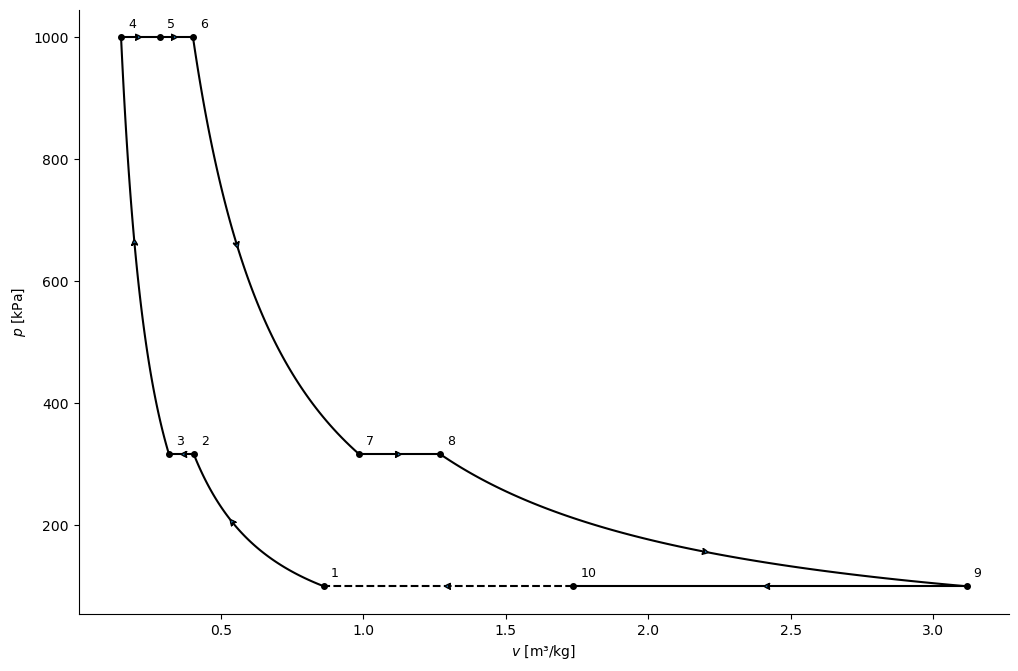

In [10]:
pv = air.pv_diagram()

# plot each state on the p,v diagram
for i in [1,2,3,4,5,6,7,8,9,10]:
    pv.plot_state(states[i],label_loc='north east')


# plot the process paths (Note: isentropic and non-ideal path not implemented for constant specific heat)
pv.plot_process(states[1],states[2],path='nonideal')
pv.plot_process(states[2],states[3],path='isobaric')
pv.plot_process(states[3],states[4],path='nonideal')
pv.plot_process(states[4],states[5],path='isobaric')
pv.plot_process(states[5],states[6],path='isobaric')
pv.plot_process(states[6],states[7],path='nonideal')
pv.plot_process(states[7],states[8],path='isobaric')
pv.plot_process(states[8],states[9],path='nonideal');
pv.plot_process(states[9],states[10],path='isobaric');
pv.plot_process(states[10],states[1],path='isobaric',linestyle='dashed');

#### (b) $T$-$s$ diagram
***Note: the process paths do not line up with the state points in this diagram because the paths were 
calculated for variable specific heat, but the states were calculated using the
cold-air-standard assumptions (constant specific heat).  Therefore the errors resulting from the constant specific heat assumption are evident in the misalignment on the graph.  The larger inconsistencies at the higher temperatures illustrate how the constant specific heat assumption becomes increasing inaccurate as the temperature change of the fluid increases.***

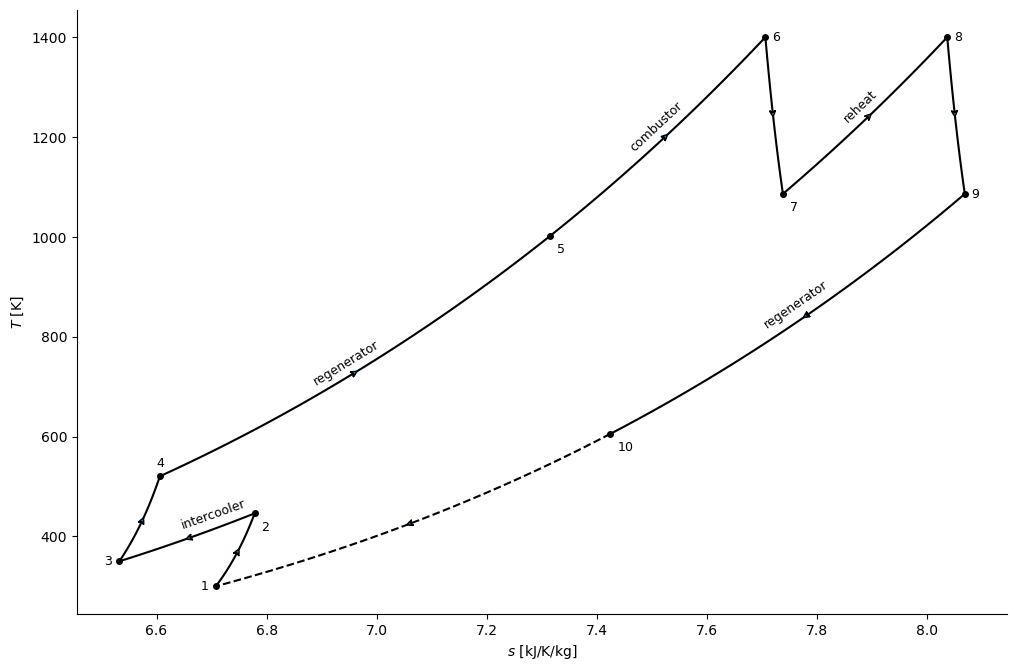

In [11]:
Ts = air.Ts_diagram()

# plot each state on the p,v diagram
for i in [1,3]:
    Ts.plot_state(states[i],label_loc='west')
Ts.plot_state(states[4])
for i in [6,8,9]:
    Ts.plot_state(states[i],label_loc='east')
for i in [2,5,7,10]:
    Ts.plot_state(states[i],label_loc='south east')
    
# plot the process paths (Note: isentropic and non-ideal path not implemented for constant specific heat)
Ts.plot_process(states[1],states[2],path='nonideal')
Ts.plot_process(states[2],states[3],path='isobaric',label='intercooler',labelprops=dict(ha='left'))
Ts.plot_process(states[3],states[4],path='nonideal')
Ts.plot_process(states[4],states[5],path='isobaric',label='regenerator')
Ts.plot_process(states[5],states[6],path='isobaric',label='combustor')
Ts.plot_process(states[6],states[7],path='nonideal')
Ts.plot_process(states[7],states[8],path='isobaric',label='reheat')
Ts.plot_process(states[8],states[9],path='nonideal');
Ts.plot_process(states[9],states[10],path='isobaric',label='regenerator');
Ts.plot_process(states[10],states[1],path='isobaric',linestyle='dashed');